'planning_simulation.mp4'

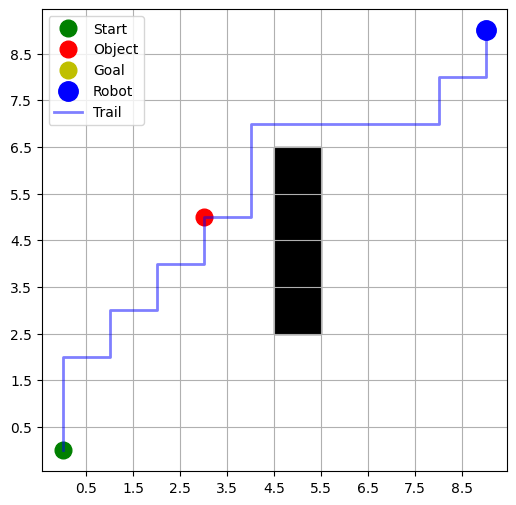

In [2]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define grid size and obstacles
GRID_SIZE = 10
grid = np.zeros((GRID_SIZE, GRID_SIZE))
grid[3:7, 5] = 1  # Obstacle

start, goal = (0, 0), (9, 9)
object_location = (5, 3)

def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def a_star(grid, start, goal):
    rows, cols = grid.shape
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1]
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                temp_g_score = g_score[current] + 1
                if neighbor not in g_score or temp_g_score < g_score[neighbor]:
                    g_score[neighbor] = temp_g_score
                    f_score[neighbor] = temp_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
                    came_from[neighbor] = current
    return []

# Calculate paths
path_to_object = a_star(grid, start, object_location)
path_to_goal = a_star(grid, object_location, goal)
full_path = path_to_object + path_to_goal[1:]

# Moving simulation with trails and saving as MP4
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1))
ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1))
ax.grid(True)

# Draw obstacles
for y in range(GRID_SIZE):
    for x in range(GRID_SIZE):
        if grid[y, x] == 1:
            ax.add_patch(plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color='black'))

# Mark Start, Object, and Goal
ax.plot(start[1], start[0], 'go', markersize=12, label='Start')
ax.plot(object_location[1], object_location[0], 'ro', markersize=12, label='Object')
ax.plot(goal[1], goal[0], 'yo', markersize=12, label='Goal')

# Setup animation with trail effect
robot_dot, = ax.plot([], [], 'bo', markersize=14, label='Robot')
trail, = ax.plot([], [], 'b-', linewidth=2, alpha=0.5, label='Trail')

trail_points_x = []
trail_points_y = []

def update(frame):
    if frame < len(full_path):
        x, y = full_path[frame][1], full_path[frame][0]
        trail_points_x.append(x)
        trail_points_y.append(y)
        robot_dot.set_data([x], [y])  # Wrap x and y in lists
        trail.set_data(trail_points_x, trail_points_y)
    return robot_dot, trail

ani = animation.FuncAnimation(fig, update, frames=len(full_path), interval=700, blit=True, repeat=False)
ax.legend(loc="upper left")

# Save animation as MP4
video_file_path = "planning_simulation.mp4"
ani.save(video_file_path, writer='ffmpeg')

video_file_path